In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
tf.compat.v1.disable_eager_execution()

In [4]:
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)

In [5]:
from sklearn.datasets import load_sample_image

In [6]:
china = load_sample_image("china.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)
batch, height, width, channels = images.shape

In [7]:
batch, height, width, channels

(1, 70, 120, 1)

## conv2d

In [8]:
fmap = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
fmap[:,3,:,0] = 1 # ligne verticale
fmap[3,:,:,1] = 1 # ligne horizontale

In [9]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

fmap_0


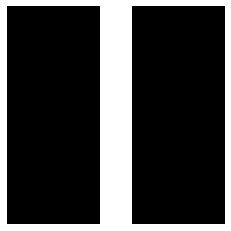

fmap_1


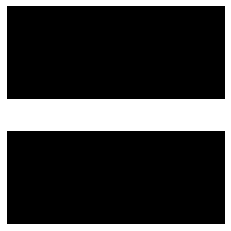

In [10]:
plot_image(fmap[:, :, 0, 0])
print("fmap_0")
plt.show()
print("fmap_1")
plot_image(fmap[:, :, 0, 1])
plt.show()

In [11]:
reset_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, height, width, channels))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,2,2,1], padding="SAME")

In [12]:
with tf.compat.v1.Session() as sess:
    output = sess.run(convolution, feed_dict={X: images})

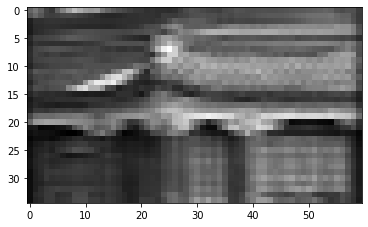

In [13]:
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

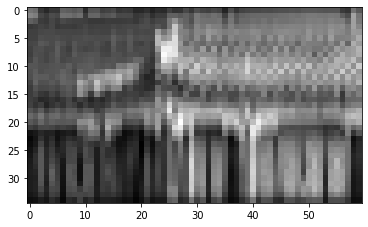

In [14]:
plt.imshow(output[0,:,:,0], cmap="gray")
plt.show()

In [19]:
reset_graph()

X = tf.compat.v1.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
convolution = tf.compat.v1.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

In [20]:
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    init.run()
    output = sess.run(convolution, feed_dict={X: images})

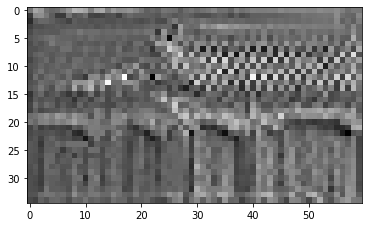

In [21]:
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

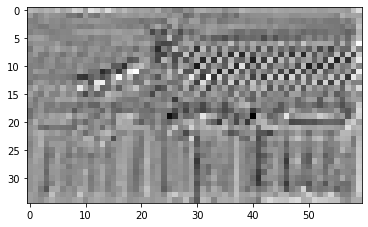

In [22]:
plt.imshow(output[0,:,:,0], cmap="gray")
plt.show()

## max_pool

In [29]:
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,1,1,1],padding="VALID")

with tf.compat.v1.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: images})

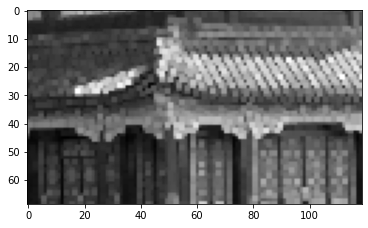

In [30]:
plt.imshow(output[0], cmap="gray")
plt.show()